In [53]:
#importing python powerful libraries
import pandas as pd         #for data manipulation
import numpy as np          #for faster calculations
import requests             #send a request to the server
import os                   #do changes for operating system
#import tweepy               #get data from twitter API 
import json                 #to deal with json file format
import matplotlib.pyplot as plt

# Gathering Data

In [5]:
#Reading Twitter Archive as a DataFrame
archive_df=pd.read_csv('twitter-archive-enhanced.csv')

In [ ]:
#Download image-predictions.tsv file that is  hosted on Udacity's servers.
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name=url.split('/')[-1]
if not os.path.isfile(file_name) :
    
    response=requests.get(url)
    with open(file_name,mode='wb') as file:
        file.write(response.content)

In [6]:
#Reading the image-predictions.tsv file as a DataFrame
image_predictions_df=pd.read_csv('image-predictions.tsv' , sep='\t')

In [ ]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True , wait_on_rate_limit_notify=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [17]:
store_api=list()
tweets_json=open('tweet_json.txt','r')
for line in tweets_json :
        tweet = json.loads(line)
        
        tweet_id=tweet['id']
        retweet_count=tweet['retweet_count']
        favorite_count=tweet['favorite_count']
        
        store_api.append({'tweet_id':tweet_id  , 'retweet_count' : retweet_count , 'favorite_count' : favorite_count  })
        
api_df=pd.DataFrame(store_api)

# Assessing Data

In [7]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
archive_df['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [9]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
archive_df.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1126,729854734790754305,NaN,NaN,2016-05-10 02:05:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ollie. He conducts this train. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/729854734...,11,10,Ollie,None,None,None,None
517,810896069567610880,NaN,NaN,2016-12-19 17:14:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He just found out he needs bra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810896069...,11,10,Hunter,None,None,None,None
888,759846353224826880,NaN,NaN,2016-07-31 20:21:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirby. He's a Beneblip Cumberpat. Pret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759846353...,11,10,Kirby,None,None,None,None
1637,684195085588783105,NaN,NaN,2016-01-05 02:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tino. He really likes corndogs. 9/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684195085...,9,10,Tino,None,None,None,None
2175,669214165781868544,NaN,NaN,2015-11-24 18:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jaspers. He is a northeastern Gillette...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669214165...,10,10,Jaspers,None,None,None,None
2198,668815180734689280,NaN,NaN,2015-11-23 15:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a wild Toblerone from Papua New Guinea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668815180...,7,10,a,None,None,None,None


In [11]:
archive_df[archive_df['text'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [13]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
api_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [19]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.2 KB


In [20]:
archive_df.expanded_urls.duplicated().sum()

137

In [21]:
image_predictions_df.jpg_url.duplicated().sum()

66

In [22]:
archive_df.name.value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Tucker      10
Penny       10
Lola        10
Bo           9
Winston      9
the          8
Sadie        8
Toby         7
an           7
Buddy        7
Daisy        7
Bailey       7
Dave         6
Milo         6
Name: name, dtype: int64

In [23]:
x=archive_df[archive_df.name=='an']
x.text

759     RT @dog_rates: This is an East African Chalupa...
1025    This is an Iraqi Speed Kangaroo. It is not a d...
1362    This is an East African Chalupa Seal. We only ...
2204    This is an Irish Rigatoni terrier named Berta....
2333    This is an extremely rare horned Parthenon. No...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

In [24]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
archive_df[archive_df.rating_denominator==0].text.values

array(["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"],
      dtype=object)

### Quality issues:

- `archive_df` timestamp datatype is str instead of datetime.
- `archive_df` in_reply_to_status_id & retweeted_status_id non null have no ratings and should be dropped.
- `archive_df` missing values in expanded_urls. 
- `archive_df` has tweets without images. 
- `image_predictions_df` has retweets and replies. 
- `image_predictions_df` 66 Duplicated URLs 
- `archive_df` Null values are called None in (name - doggo - floofer - pupper - puppo).  
- `archive_df` source contains < a > tag instead of its contents. 
- `archive_df` missing values at (name - doggo - floofer - pupper - puppo) columns. 
- `archive_df`inaccurate names in name column.                                    
- `archive_df`inaccurate ratings in (rating_numerator,rating_denominator) column.
- `image_predictions_df` undescriptive column headers.                            
- Different number of entries in archive_df , api_df 
### Tidiness Issues:
- (doggo - floofer - pupper - puppo) columns should be represented in one column as values.
- api_df should be combained with archive_df 

# Clean

####  Define :
- __archive_clean:__ Drop retweets , replies and Empty Urls rows.
- __archive_clean:__ Drop Tweets without images (Not in image predictions dataframe)
- __Image_predictios_clean:__ Drop Retweets and Replies that doesn't have ratings (Check if they are in archive_clean) 
- __archive_clean:__ extract content of a tag in source column using .str.extract() function with REGEX
- __archive_clean:__ Convert datatype of timestamp using to_datetime() method 
- __archive_clean:__ Convert 'None' into "" using replace()
- __archive_clean:__ make new column called dog_stage from adding stages in (doggo-puppo-pupper-floofer)columns
- Drop Unwanted Columns
- Combine archive_clean and api data into one df

#### Code : 

In [26]:
#Making a Copy of each DataFrame
archive_clean=archive_df.copy()
image_predictions_clean=image_predictions_df.copy()
api_clean=api_df.copy()

In [27]:
retweets=archive_clean.retweeted_status_id.notnull()
archive_clean=archive_clean[~retweets]

replies=archive_clean.in_reply_to_status_id.notnull()
archive_clean=archive_clean[~replies]

In [28]:
non_urls=archive_clean.expanded_urls.isnull()
archive_clean=archive_clean[~non_urls]

In [29]:
tweets=list(archive_clean.tweet_id.unique())
image_predictions_clean=image_predictions_clean[image_predictions_clean['tweet_id'].isin(tweets)]

In [30]:
tweets_img=list(image_predictions_clean.tweet_id.unique())
archive_clean=archive_clean[archive_clean['tweet_id'].isin (tweets_img)]

In [31]:
image_predictions_clean.reset_index(inplace=True)
archive_clean.reset_index(inplace=True)

In [32]:
archive_clean['source'] = archive_clean['source'].str.extract('>(.+?)<', expand=False).str.strip()

In [33]:
archive_clean['timestamp' ]=pd.to_datetime(archive_clean['timestamp'])

In [34]:
archive_clean.replace('None' , '' , inplace=True)
archive_clean['dog_stage']=archive_clean['doggo']+archive_clean['floofer']+archive_clean['puppo']+archive_clean['pupper']
archive_clean.replace('' , np.NaN , inplace=True)

stages=['doggopupper' , 'doggopuppo' , 'doggofloofer']
for stage in stages:
    archive_clean.loc[archive_clean['dog_stage']==stage,'dog_stage']=stage[:5]+'-'+stage[5:]

In [35]:
archive_clean.drop(['retweeted_status_id' , 'in_reply_to_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp' , 'in_reply_to_user_id' , 'puppo' , 'doggo' , 'floofer' , 'pupper'] , axis=1, inplace=True)

In [36]:
archive_clean=pd.merge(archive_clean,api_clean, on='tweet_id')

In [37]:
archive_clean.drop(['index'] , axis=1 , inplace=True)
image_predictions_clean.drop(['index'] , axis=1 , inplace=True)

In [38]:
archive_clean['tweet_month']=archive_clean.timestamp.dt.month_name()

#### Test :

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1447 non-null   object             
 8   dog_stage           303 non-null    object             
 9   retweet_count       1971 non-null   int64              
 10  favorite_count      1971 non-null   int64              
 11  tweet_month         1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5

In [40]:
archive_clean['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [41]:
archive_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,tweet_month
298,824663926340194305,2017-01-26 17:02:56+00:00,Twitter for iPhone,This is Wilson. Named after the volleyball. He...,https://twitter.com/dog_rates/status/824663926...,13,10,Wilson,NaN,1993,11113,January


In [42]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 113.6+ KB


In [43]:
archive_clean.dog_stage.value_counts()

pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

# Storing files:

In [44]:
archive_clean.to_csv('twitter_data.csv')
image_predictions_clean.to_csv('image_clean_data.csv')

In [45]:
image_clean=pd.read_csv('image_clean_data.csv')
twitter_data=pd.read_csv('twitter_archive_master.csv')

# Insights and Visulaizations:

In [46]:
dog_stage=twitter_data.dog_stage.value_counts().nlargest(3).index.tolist()
max_retweet=twitter_data.groupby(['dog_stage'])['retweet_count'].max()
max_fav=twitter_data.groupby(['dog_stage'])['favorite_count'].max()
freq_month=twitter_data.tweet_month.mode()[0]

In [47]:
print ('The most three frequent dog stages are:' , dog_stage[0]+', '+dog_stage[1]+' and '+dog_stage[2]+'.')

The most three frequent dog stages are: pupper, doggo and puppo.


In [48]:
print ('The most tweet people retweeted was for a', max_retweet.idxmax()+'.')
print ('The most tweet people liked was for a', max_fav.idxmax()+'.')

The most tweet people retweeted was for a doggo.
The most tweet people liked was for a puppo.


In [49]:
print (freq_month, 'is the month at which people tweeted the most in We Rate Dogs.')

December is the month at which people tweeted the most in We Rate Dogs.


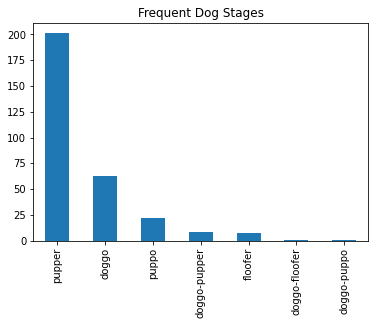

In [50]:
dog_stage_visualization=twitter_data.dog_stage.value_counts()
dog_stage_visualization.plot(kind='bar' , title='Frequent Dog Stages');

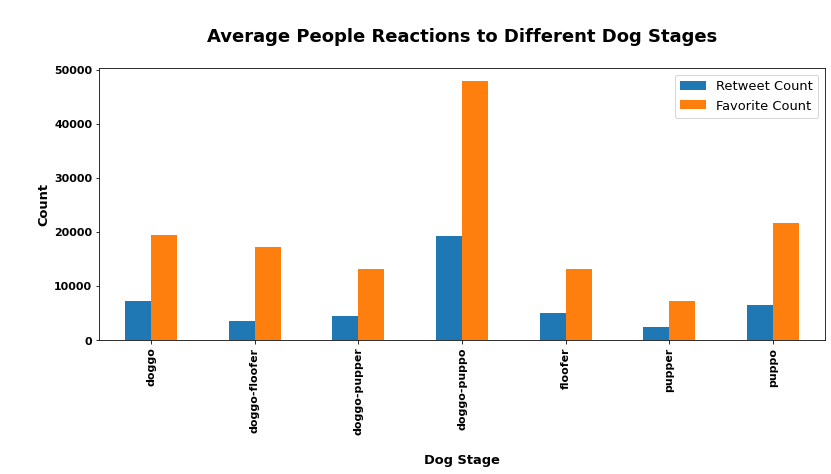

In [78]:
reactions=twitter_data.groupby(['dog_stage'])[['retweet_count' , 'favorite_count']].mean()
reactions.plot(kind='bar' , figsize=(13,5));
plt.title('\nAverage People Reactions to Different Dog Stages\n',fontsize=18,fontweight='bold');
plt.xlabel('\nDog Stage'  , fontsize=13  ,fontweight='bold');
plt.ylabel('\n\nCount' , fontsize=13  ,fontweight='bold');
plt.xticks(fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');
plt.legend(['Retweet Count' , 'Favorite Count'], prop={'size': 13}) ;

In [72]:
reactions=twitter_data.groupby(['dog_stage'])[['retweet_count' , 'favorite_count']].mean()
reactions.values[:]

array([[ 7125.6984127 , 19356.38095238],
       [ 3433.        , 17169.        ],
       [ 4397.25      , 13219.875     ],
       [19196.        , 47844.        ],
       [ 4968.71428571, 13206.        ],
       [ 2382.50248756,  7250.52736318],
       [ 6473.95454545, 21582.09090909]])